## Before you start

In [ ]:
!nvidia-smi

Wed Apr 10 14:19:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Download the data

In [ ]:
# https://www.kaggle.com/datasets/saikatdatta1994/tea-leaf-disease

In [ ]:
from google.colab import files

# Upload the Kaggle API key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavantejamedi","key":"9641de9cc08907ccfb8c3aa4cf6797c5"}'}

In [ ]:
import os

# Move the Kaggle API key to the required location
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the API key
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
import kaggle

# Define the username and dataset name
username = "saikatdatta1994"
dataset_name = "tea-leaf-disease"

# Download the dataset
kaggle.api.dataset_download_files(username + '/' + dataset_name, unzip=True)

## Prepare the Data

Dataset Structure
```
Dataset
│
└───train
│   └───ClassA
│       │   ClassA_1.jpg
│       │   ClassA_2.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_1.jpg
│       │   ClassB_2.jpg
│       │   ...
│   └───...
└───test
│   └───ClassA
│       │   ClassA_9090.jpg
│       │   ClassA_9895.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2343.jpg
│       │   ClassB_2312.jpg
│       │   ...
│   └───...
└───val
│   └───ClassA
│       │   ClassA_3070.jpg
│       │   ClassA_2845.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2903.jpg
│       │   ClassB_2232.jpg
│       │   ...
│   └───...
```


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
!mkdir '/content/dataset'
DATA_DIR='/content/dataset'

In [ ]:
source_dataset_path = '/content/Tea_Leaf_Disease'
destination_dataset_path = '/content/dataset'

In [ ]:
os.makedirs(os.path.join(destination_dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'val'), exist_ok=True)

In [ ]:
# List of classes
classes = os.listdir(source_dataset_path)

# Loop through each class
for class_name in classes:
    class_dir = os.path.join(source_dataset_path, class_name)

    # Split the images for the current class into train, test, and val sets
    train_images, test_images = train_test_split(os.listdir(class_dir), test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Create subdirectories for each class in train, test, and val
    os.makedirs(os.path.join(destination_dataset_path, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'test', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'val', class_name), exist_ok=True)

    # Move images to their respective directories
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'train', class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'test', class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'val', class_name, image))


## Install YOLOv8


In [ ]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/dataset', epochs=32, imgsz=64)

100%|██████████| 5.30M/5.30M [00:00<00:00, 73.5MB/s]


Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=32, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 6.23M/6.23M [00:00<00:00, 44.8MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train... 4693 images, 0 corrupt: 100%|██████████| 4693/4693 [00:03<00:00, 1339.57it/s]

train: New cache created: /content/dataset/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/val... 587 images, 0 corrupt: 100%|██████████| 587/587 [00:00<00:00, 1190.43it/s]

val: New cache created: /content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 32 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/32     0.396G      1.552         16         64:  88%|████████▊ | 260/294 [00:17<00:01, 19.00it/s]

       1/32     0.396G      1.525         16         64:  95%|█████████▍| 279/294 [00:18<00:00, 17.19it/s]
100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:01<00:00, 17.85it/s]


                   all       0.75      0.997

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.78it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 22.59it/s]

                   all      0.903      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 20.48it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:01<00:00, 16.60it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 25.91it/s]

                   all      0.906          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 22.95it/s]

                   all      0.908          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 19.78it/s]

                   all      0.928          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.42it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      10/32     0.373G     0.4358          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.91it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


      11/32     0.373G     0.4083          5         64: 100%|██████████| 294/294 [00:17<00:00, 17.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 21.96it/s]

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


      12/32     0.373G     0.3943          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.64it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


      13/32     0.373G     0.3971          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 19.49it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      14/32     0.373G     0.3633          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 22.79it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


      15/32     0.373G     0.3557          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 21.68it/s]

                   all      0.942          1



      Epoch    GPU_mem       loss  Instances       Size


      16/32     0.373G     0.3388          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:01<00:00, 14.00it/s]


                   all      0.963          1

      Epoch    GPU_mem       loss  Instances       Size


      17/32     0.373G     0.3387          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 21.73it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


      18/32     0.373G     0.3269          5         64: 100%|██████████| 294/294 [00:15<00:00, 18.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 22.57it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


      19/32     0.373G     0.3165          5         64: 100%|██████████| 294/294 [00:17<00:00, 17.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 22.26it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      20/32     0.373G     0.3153          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 23.76it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


      21/32     0.373G     0.2959          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.05it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


      22/32     0.373G     0.2946          5         64: 100%|██████████| 294/294 [00:17<00:00, 17.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 23.91it/s]

                   all      0.949          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      23/32     0.373G     0.2933          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 21.57it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


      24/32     0.373G      0.276          5         64: 100%|██████████| 294/294 [00:17<00:00, 16.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 19.73it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      25/32     0.373G     0.2661          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.77it/s]

                   all      0.957          1



      Epoch    GPU_mem       loss  Instances       Size


      26/32     0.373G     0.2528          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.09it/s]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


      27/32     0.373G     0.2647          5         64: 100%|██████████| 294/294 [00:17<00:00, 17.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 20.84it/s]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


      28/32     0.373G     0.2706          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 23.84it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      29/32     0.373G     0.2576          5         64: 100%|██████████| 294/294 [00:17<00:00, 16.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 22.34it/s]

                   all      0.966          1



      Epoch    GPU_mem       loss  Instances       Size


      30/32     0.373G     0.2594          5         64: 100%|██████████| 294/294 [00:16<00:00, 18.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.57it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


      31/32     0.373G      0.241          5         64: 100%|██████████| 294/294 [00:16<00:00, 17.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 23.32it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      32/32     0.373G     0.2349          5         64: 100%|██████████| 294/294 [00:17<00:00, 16.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 24.35it/s]

                   all      0.966          1



32 epochs completed in 0.159 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 4693 images in 6 classes ✅ 
val: /content/dataset/val... found 587 images in 6 classes ✅ 
test: /content/dataset/test... found 587 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:01<00:00, 16.22it/s]


                   all      0.971          1
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


## Validate Custom Model

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 4693 images in 6 classes ✅ 
val: /content/dataset/val... found 587 images in 6 classes ✅ 
test: /content/dataset/test... found 587 images in 6 classes ✅ 


val: Scanning /content/dataset/val... 587 images, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 37/37 [00:01<00:00, 20.51it/s]


                   all      0.971          1
Speed: 0.0ms preprocess, 1.4ms inference, 0.1ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


1.0

## Performance metrices

In [ ]:
from IPython.display import display, Image

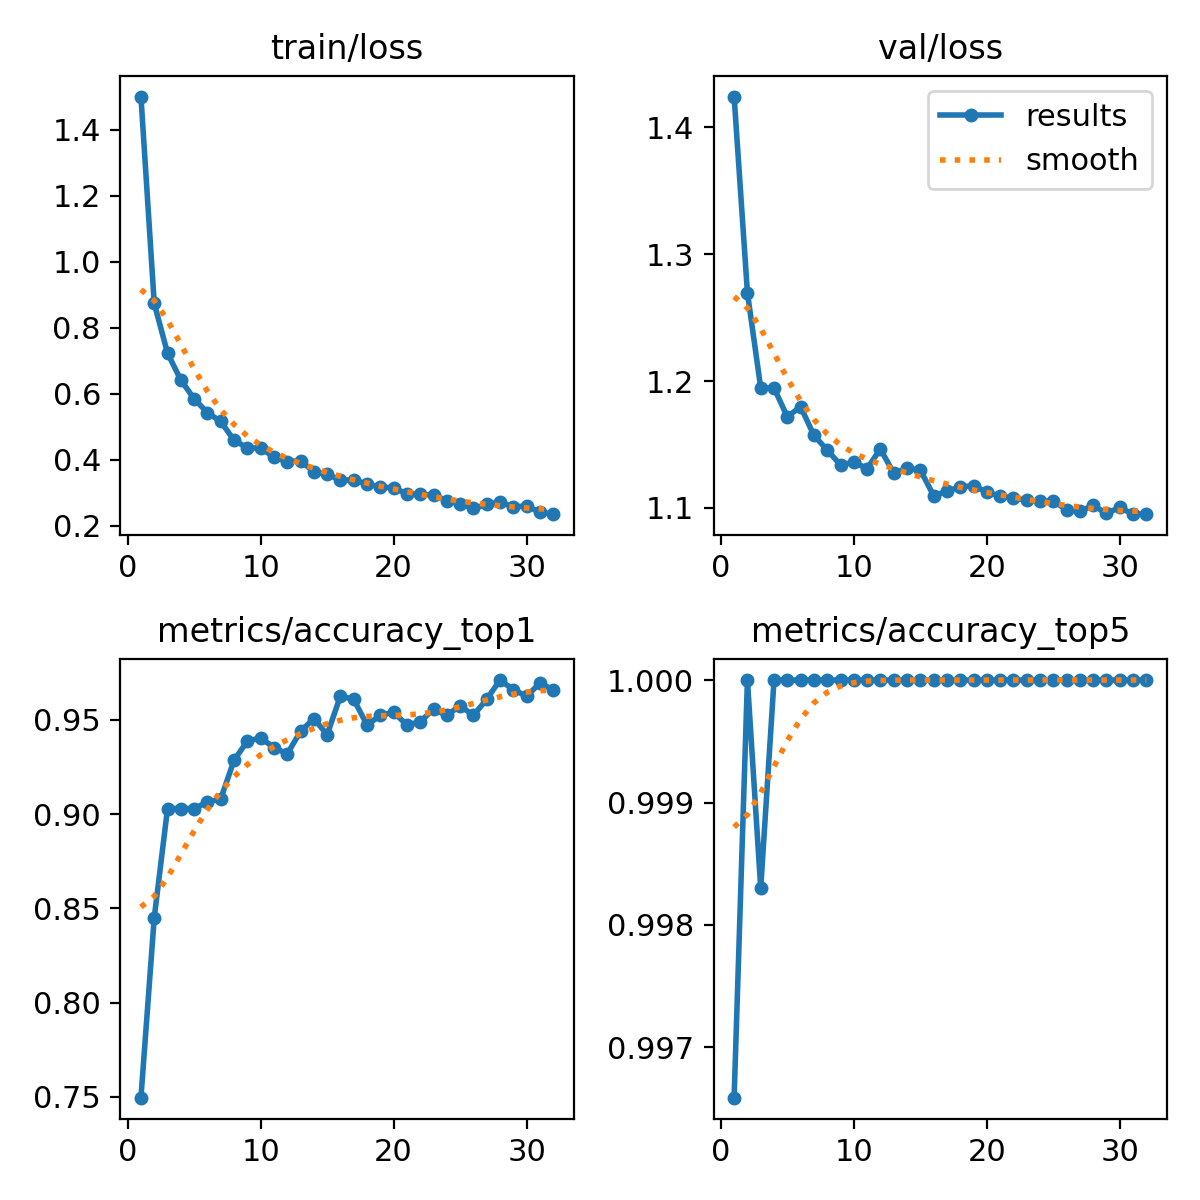

In [ ]:
display(Image(filename="/content/runs/classify/train/results.png"))

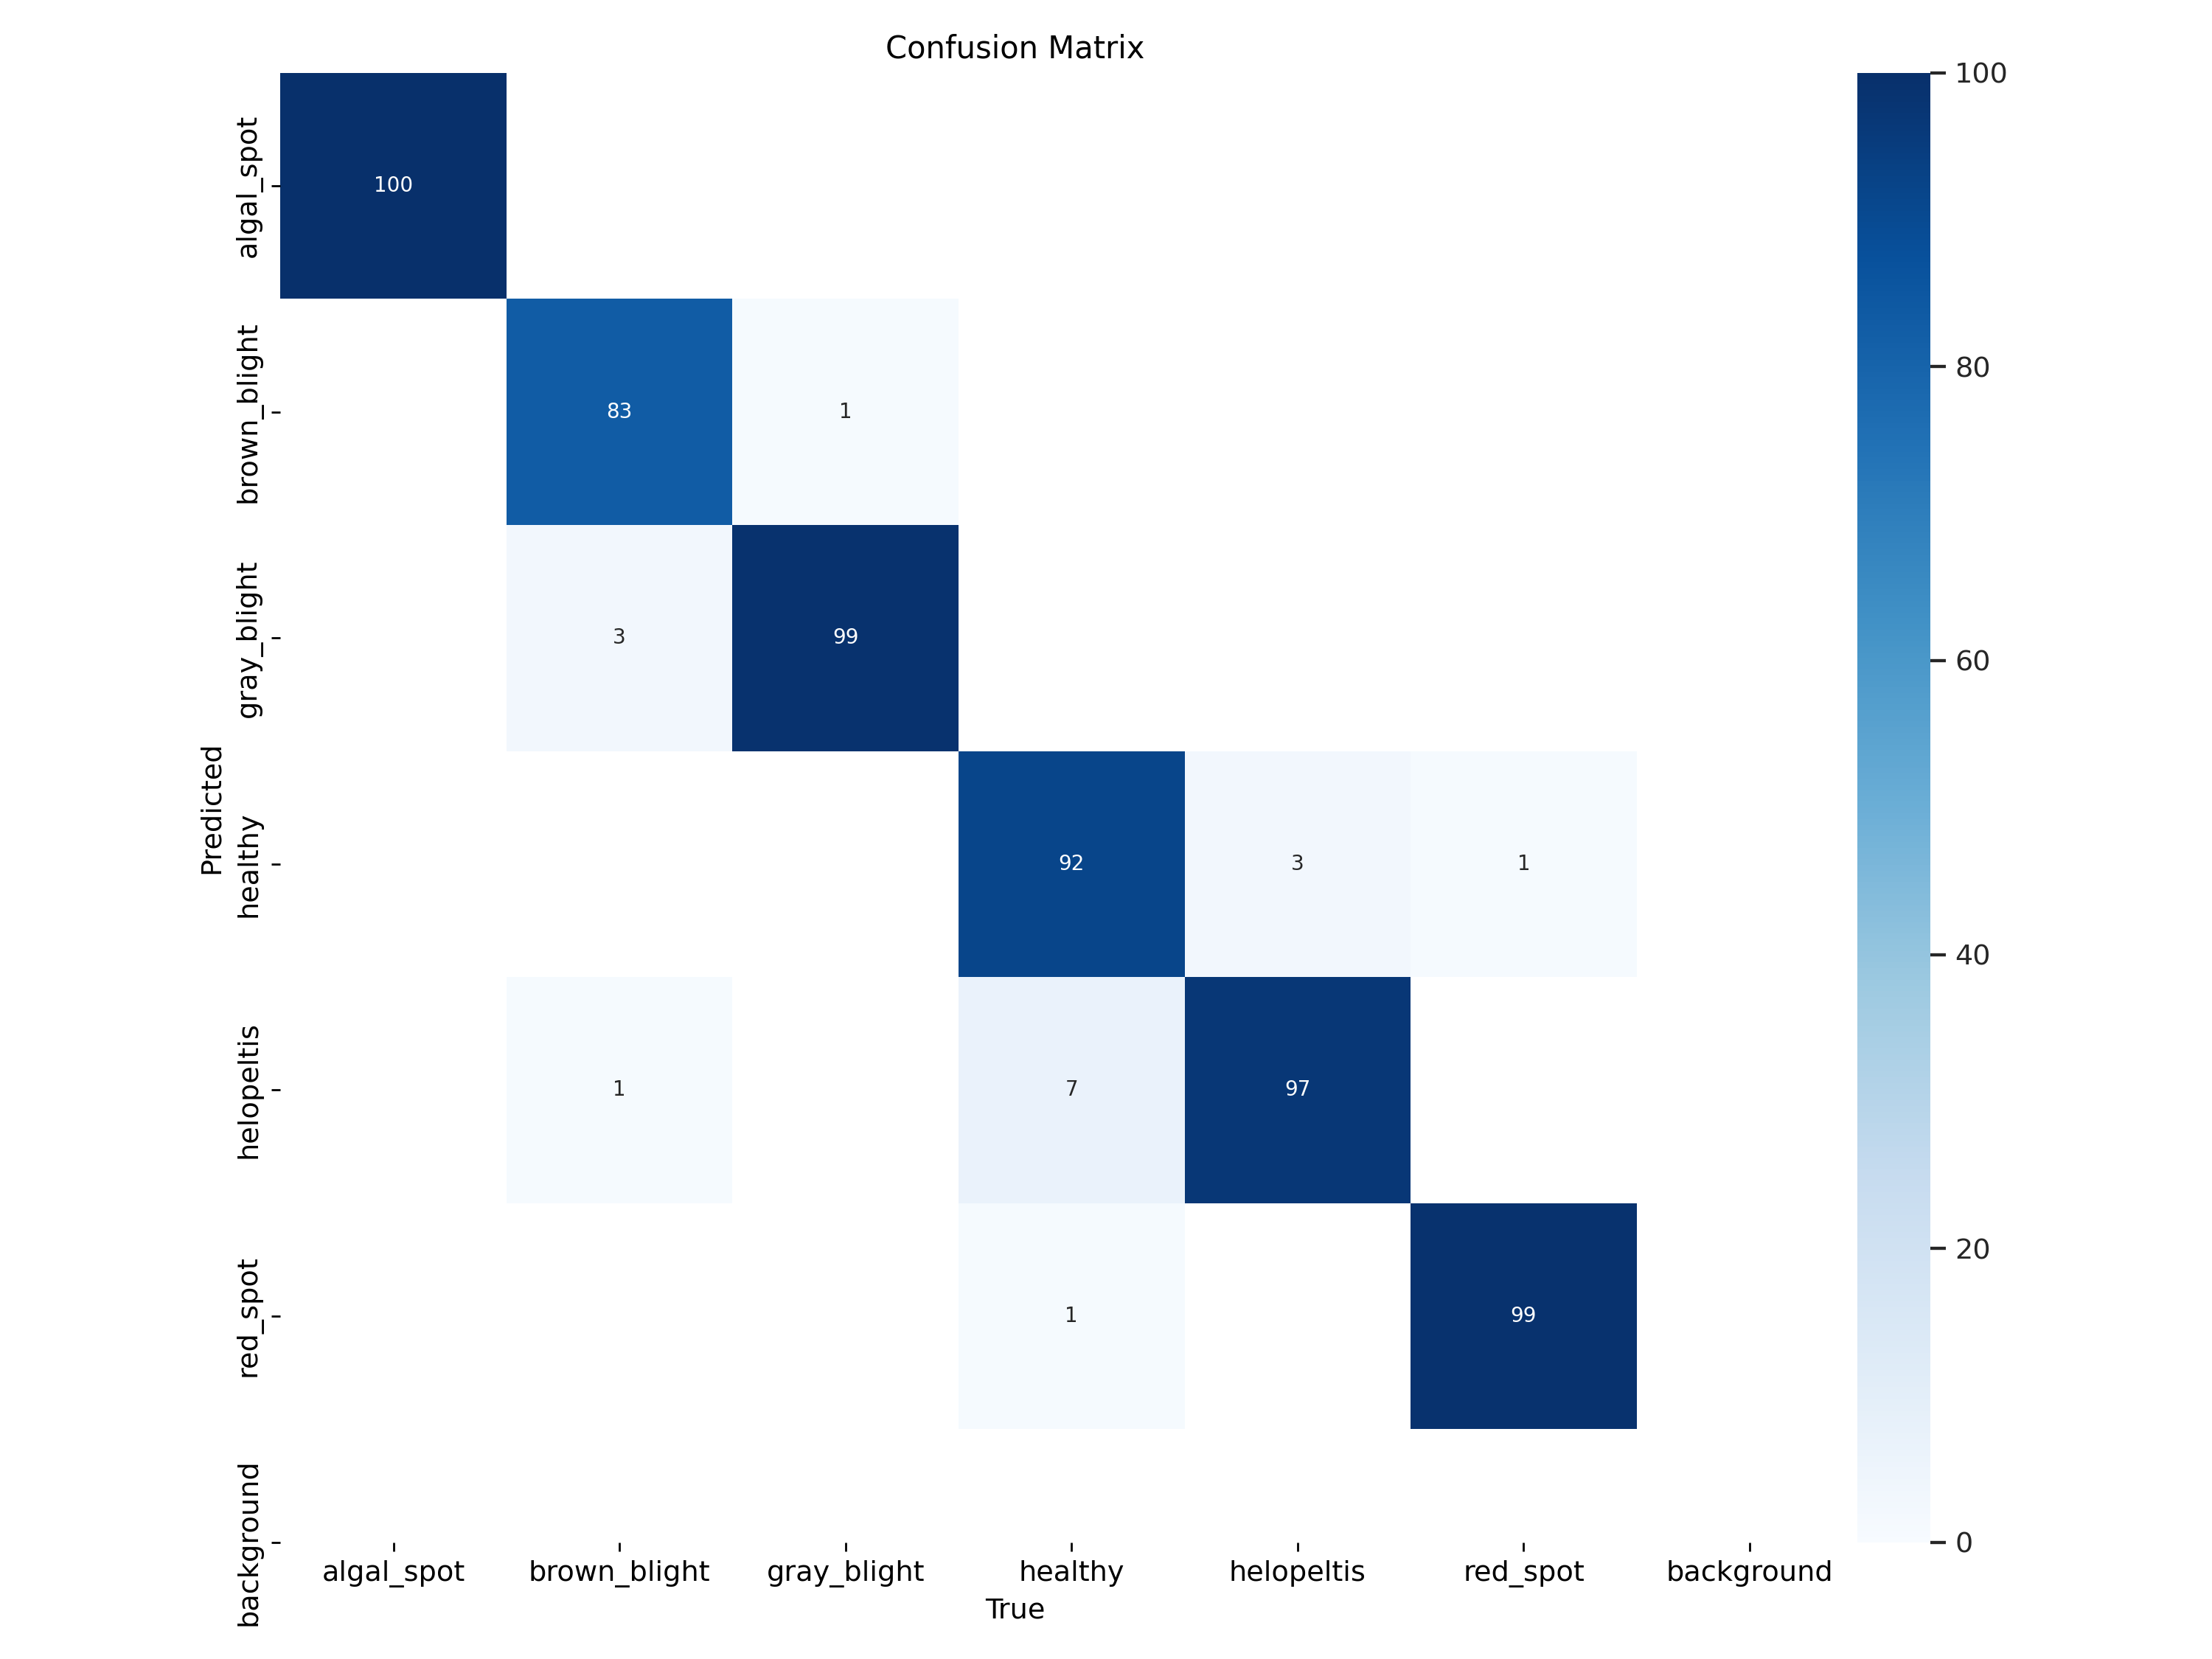

In [ ]:
display(Image(filename="/content/runs/classify/train/confusion_matrix.png"))

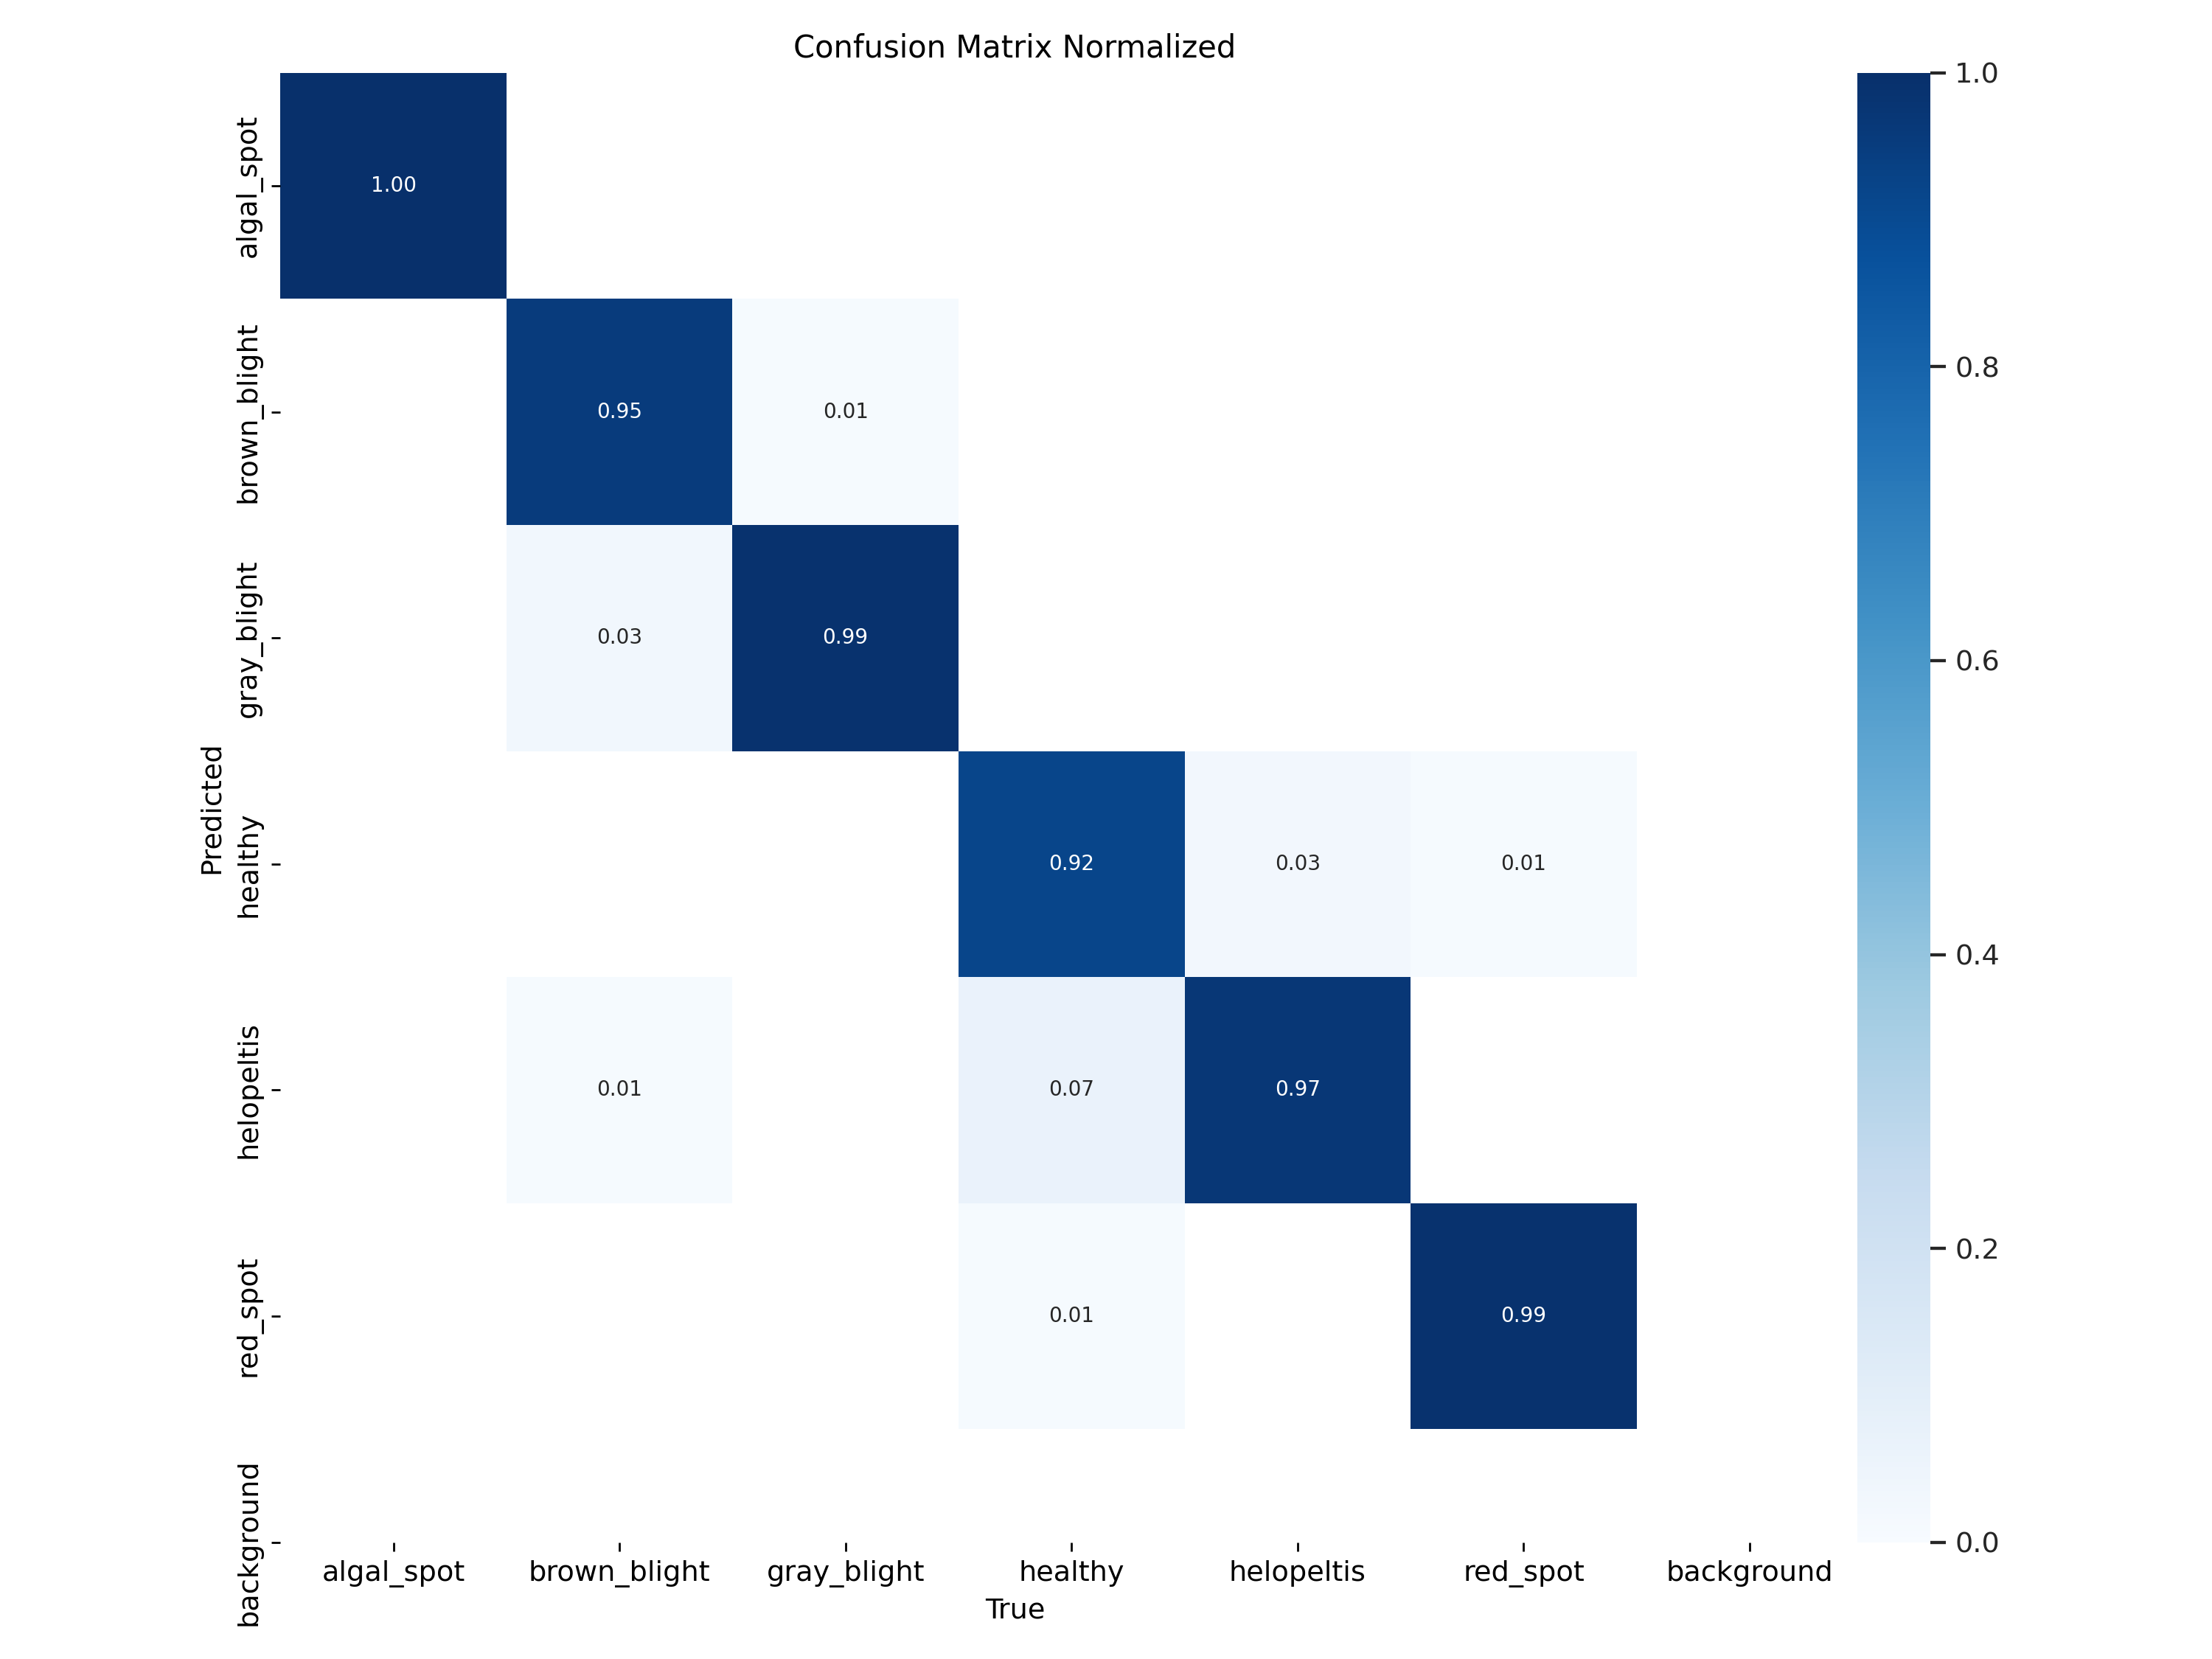

In [ ]:
display(Image(filename="/content/runs/classify/train/confusion_matrix_normalized.png"))

## Inference with Custom Model

In [ ]:
from ultralytics import YOLO

# load a custom model
model = YOLO('/content/runs/classify/train/weights/best.pt')

Demo_Img="/content/dataset/test/gray_blight/20211227_164325.jpg"

# Predict with the model
results = model(Demo_Img, save=True)


image 1/1 /content/dataset/test/gray_blight/20211227_164325.jpg: 64x64 gray_blight 0.70, red_spot 0.16, brown_blight 0.14, healthy 0.00, algal_spot 0.00, 5.4ms
Speed: 16.8ms preprocess, 5.4ms inference, 0.2ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/predict


## Download the Model

In [ ]:
# Trigger the download
files.download('/content/runs/classify/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Tuning

In [ ]:
print(model)

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True

In [ ]:
# Pip install method (recommended)
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

import os
import kaggle
import shutil
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
from sklearn.model_selection import train_test_split

# Download the dataset
from google.colab import files
# Upload the Kaggle API key
files.upload()
# Move the Kaggle API key to the required location
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
# Set permissions for the API key
os.chmod('/root/.kaggle/kaggle.json', 600)
# Define the username and dataset name
username = "saikatdatta1994"
dataset_name = "tea-leaf-disease"
# Download the dataset
kaggle.api.dataset_download_files(username + '/' + dataset_name, unzip=True)

# prepare the data
!mkdir '/content/dataset'
DATA_DIR='/content/dataset'
source_dataset_path = '/content/Tea_Leaf_Disease'
destination_dataset_path = '/content/dataset'
os.makedirs(os.path.join(destination_dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'val'), exist_ok=True)
# List of classes
classes = os.listdir(source_dataset_path)
# Loop through each class
for class_name in classes:
    class_dir = os.path.join(source_dataset_path, class_name)

    # Split the images for the current class into train, test, and val sets
    train_images, test_images = train_test_split(os.listdir(class_dir), test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Create subdirectories for each class in train, test, and val
    os.makedirs(os.path.join(destination_dataset_path, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'test', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'val', class_name), exist_ok=True)

    # Move images to their respective directories
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'train', class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'test', class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'val', class_name, image))

# Training
# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/dataset', epochs=35, imgsz=64)

# Download the Model
files.download('/content/runs/classify/train/weights/best.pt')

# Validation
# Validate the model
model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/dataset', epochs=50, imgsz=64)

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=50, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

In [ ]:
# Load a model
model = YOLO('/content/runs/classify/train4/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 4693 images in 6 classes ✅ 
val: /content/dataset/val... found 587 images in 6 classes ✅ 
test: /content/dataset/test... found 587 images in 6 classes ✅ 
val: Scanning /content/dataset/val... 587 images, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 37/37 [00:01<00:00, 20.27it/s]
                   all      0.974          1
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val4


1.0

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/dataset', epochs=30, imgsz=64)

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=30, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

In [ ]:
# Load a model
model = YOLO('/content/runs/classify/train2/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 4693 images in 6 classes ✅ 
val: /content/dataset/val... found 587 images in 6 classes ✅ 
test: /content/dataset/test... found 587 images in 6 classes ✅ 
val: Scanning /content/dataset/val... 587 images, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 37/37 [00:01<00:00, 29.70it/s]
                   all      0.966          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


1.0

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/dataset', epochs=25, imgsz=64)

100%|██████████| 5.28M/5.28M [00:00<00:00, 80.5MB/s]
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=25, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, b

In [ ]:
# Load a model
model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 4693 images in 6 classes ✅ 
val: /content/dataset/val... found 587 images in 6 classes ✅ 
test: /content/dataset/test... found 587 images in 6 classes ✅ 
val: Scanning /content/dataset/val... 587 images, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 37/37 [00:01<00:00, 28.27it/s]
                   all      0.959          1
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


1.0